#  Variable Age - Analisys

## Importing Dataset and Setting Dependencies

In [187]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns
sns.set_style('white')

pd.options.display.float_format = "{:,.2f}".format

## Importing and reading Dataset 

In [188]:
diabetes_csv = "Data/National_Data.csv"
diabetes_df = pd.read_csv(diabetes_csv)
diabetes_df

,yearid,fipscode,raceid,ageid,genderid,educationid,indicatorid,miscid,datasourceid,estimateid,SuppressID,datasetid,GeoLevel,Estimate,SeEstimate,LowerLimit,UpperLimit
0,1980,-1,0,5,0,0,1,0,30,61,0,40,National,1,0.1,0.9,1.2
1,1980,-1,0,5,0,0,1,0,30,101,0,40,National,915,76,764,1065
2,1980,-1,0,6,0,0,1,0,3,61,0,3,National,5.4,0.3,4.8,6
3,1980,-1,0,6,0,0,1,0,3,101,0,3,National,2337,143,2054,2621
4,1980,-1,0,6,0,0,1,0,30,61,0,40,National,5.4,0.3,4.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29097,2017,-1,1,100,0,0,2,0,3,72,0,31,National,6.1,0.5,5.2,7.1
29098,2017,-1,2,99,0,0,2,0,3,72,0,31,National,8.7,1.2,6.6,11.5
29099,2017,-1,2,100,0,0,2,0,3,72,0,31,National,9.2,1.3,7,12.1
29100,2017,-1,7,99,0,0,2,0,3,72,0,31,National,9.7,1.6,7,13.4


## Setting New Dataset for Age

In [189]:
#Reading Columns
diabetes_df.columns

Index(['yearid', 'fipscode', 'raceid', 'ageid', 'genderid', 'educationid',
       'indicatorid', 'miscid', 'datasourceid', 'estimateid', 'SuppressID',
       'datasetid', 'GeoLevel', 'Estimate', 'SeEstimate', 'LowerLimit',
       'UpperLimit'],
      dtype='object')

In [190]:
#Setting new dataset for age.
diabetes_age_df = diabetes_df.loc [:,["indicatorid", "ageid", "estimateid", "datasetid", "raceid", "yearid","Estimate"]]
diabetes_age_df

,indicatorid,ageid,estimateid,datasetid,raceid,yearid,Estimate
0,1,5,61,40,0,1980,1
1,1,5,101,40,0,1980,915
2,1,6,61,3,0,1980,5.4
3,1,6,101,3,0,1980,2337
4,1,6,61,40,0,1980,5.4
...,...,...,...,...,...,...,...
29097,2,100,72,31,1,2017,6.1
29098,2,99,72,31,2,2017,8.7
29099,2,100,72,31,2,2017,9.2
29100,2,99,72,31,7,2017,9.7


## Creating and Filtering Dataset for Age Range from 2000

In [191]:
# Placing ageid data into Age Range

# Create bins in which to place values based on races.
bins = [0,5,6,7,8]

# Create labels for these bins
labels = ["18-44", "45-64", "65-74", "75+"]

# Slice the data and place it into bins
diabetes_age_df["Age Range"] = pd.cut(diabetes_df["ageid"], bins, labels=labels)
diabetes_age_df = diabetes_age_df.dropna()
diabetes_age_df

,indicatorid,ageid,estimateid,datasetid,raceid,yearid,Estimate,Age Range
0,1,5,61,40,0,1980,1,18-44
1,1,5,101,40,0,1980,915,18-44
2,1,6,61,3,0,1980,5.4,45-64
3,1,6,101,3,0,1980,2337,45-64
4,1,6,61,40,0,1980,5.4,45-64
...,...,...,...,...,...,...,...,...
29059,2,5,72,31,0,2016,3.5,18-44
29060,2,6,72,31,0,2016,10.7,45-64
29080,2,4,72,31,0,2017,9.2,18-44
29081,2,5,72,31,0,2017,3.7,18-44


In [177]:
# Create a new df with the parameters by each variable / 1,000s (estimateid = 101)

age_analysis_pop = diabetes_age_df.loc[(diabetes_age_df["indicatorid"] == 1) & \
                  (diabetes_age_df["estimateid"] == 101) & (diabetes_age_df["datasetid"] == 40) & \
                  (diabetes_age_df["yearid"] >= 2000)]


age_analysis_pop = age_analysis_pop.reset_index(drop = True)
age_analysis_pop

,indicatorid,ageid,estimateid,datasetid,raceid,yearid,Estimate,Age Range
0,1,5,101,40,0,2000,2059,18-44
1,1,6,101,40,0,2000,5040,45-64
2,1,7,101,40,0,2000,2810,65-74
3,1,8,101,40,0,2000,1954,75+
4,1,5,101,40,0,2001,2167,18-44
...,...,...,...,...,...,...,...,...
67,1,8,101,40,0,2016,3605,75+
68,1,5,101,40,0,2017,3014,18-44
69,1,6,101,40,0,2017,10598,45-64
70,1,7,101,40,0,2017,5619,65-74


In [192]:
age_analysis_pop.dtypes

indicatorid       int64
ageid             int64
estimateid        int64
datasetid         int64
raceid            int64
yearid            int64
Estimate          int64
Age Range      category
dtype: object

## Creating Pivot Table by Year and Age Range

In [193]:
# Creating Pivot Table to determine Age Range Population by year
age_table_pop = age_analysis_pop.pivot_table(values=["Estimate"], index=["yearid"], columns=["Age Range"],aggfunc=np.sum)
age_table_pop

Estimate                   
Age Range    18-44  45-64 65-74   75+
yearid                               
2000          2059   5040  2810  1954
2001          2167   5834  2954  2051
2002          2080   6030  3029  2252
2003          2101   6239  3180  2491
2004          2173   6963  3393  2598
2005          2640   7595  3421  2529
2006          2924   7752  3469  2965
2007          2432   8093  3840  2908
2008          2553   9223  3940  2935
2009          3234   9886  4107  3263
2010          3022   9676  4563  3713
2011          2708   9702  4860  3319
2012          2673  10273  4863  3509
2013          2964  10116  5273  3820
2014          2710   9945  5654  3563
2015          2469  10603  6016  4073
2016          3115  10080  6290  3605
2017          3014  10598  5619  3817

## Filtering Dataset for Age Range Percentage (%) from 2000

In [194]:
# Create a new df with the parameters by each variable / Percentage (estimateid = 61)

age_analysis_per = diabetes_age_df.loc[(diabetes_age_df["indicatorid"] == 1) & \
                  (diabetes_age_df["estimateid"] == 61) & (diabetes_age_df["datasetid"] == 40) & \
                  (diabetes_age_df["yearid"] >= 2000)].dropna()

age_analysis_per = age_analysis_per.reset_index(drop = True)

age_analysis_per

,indicatorid,ageid,estimateid,datasetid,raceid,yearid,Estimate,Age Range
0,1,5,61,40,0,2000,1.9,18-44
1,1,6,61,40,0,2000,8.3,45-64
2,1,7,61,40,0,2000,15.8,65-74
3,1,8,61,40,0,2000,13.2,75+
4,1,5,61,40,0,2001,2,18-44
...,...,...,...,...,...,...,...,...
67,1,8,61,40,0,2016,18.5,75+
68,1,5,61,40,0,2017,2.7,18-44
69,1,6,61,40,0,2017,12.7,45-64
70,1,7,61,40,0,2017,19.1,65-74


In [195]:
# Using .pivot_table create the dataframe (https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)
# Creating Pivot Table to determine Age Range Percentage (%) Population by year
age_table_per = age_analysis_per.pivot_table(values=["Estimate"], index=["yearid"], columns=["Age Range"],aggfunc=np.sum)
age_table_per

Estimate                  
Age Range    18-44 45-64 65-74   75+
yearid                              
2000           1.9   8.3  15.8  13.2
2001             2   9.3  16.7  13.6
2002           1.9   9.3    17  14.8
2003           1.9   9.1  17.6  15.5
2004             2   9.9  18.5    16
2005           2.4  10.5  18.6  15.3
2006           2.7  10.5  18.2  17.9
2007           2.2  10.6    20  17.3
2008           2.3  11.9  19.8  16.9
2009           2.9  12.5  19.9  18.9
2010           2.7  12.1  21.4  21.3
2011           2.4    12  22.2  18.7
2012           2.4  12.5  20.5  19.4
2013           2.7  12.3    21  20.9
2014           2.4    12  21.5  19.2
2015           2.2  12.8  22.1  21.2
2016           2.7  12.1  22.1  18.5
2017           2.7  12.7  19.1    19

In [196]:
# Setting Estimate to numeric to plot successfully.

age_analysis_pop['Estimate'] = pd.to_numeric(age_analysis_pop['Estimate'])
age_analysis_pop.dtypes

age_analysis_per['Estimate'] = pd.to_numeric(age_analysis_per['Estimate'])
age_analysis_per.dtypes

indicatorid       int64
ageid             int64
estimateid        int64
datasetid         int64
raceid            int64
yearid            int64
Estimate        float64
Age Range      category
dtype: object

## Plotting Line Charts

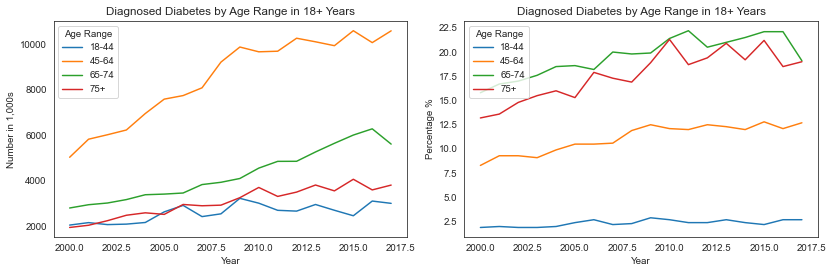

In [197]:
## Create a plot - for the dataset (https://seaborn.pydata.org/generated/seaborn.lineplot.html)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=70,figsize = (12,4))

plot00= sns.lineplot(data=age_analysis_pop, x="yearid", y="Estimate", hue="Age Range", ax=axes[0])
axes[0].set_title("Diagnosed Diabetes by Age Range in 18+ Years")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number in 1,000s")
# plt.xticks(rotation="vertical")
plt.tight_layout()


plot01= sns.lineplot(data=age_analysis_per, x="yearid", y="Estimate", hue="Age Range",ax=axes[1])
axes[1].set_title("Diagnosed Diabetes by Age Range in 18+ Years")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Percentage %")
# plt.xticks(rotation="vertical")
plt.tight_layout()


plt.savefig("Figures/Diagnosed Diabetes by Age Range in 18+ Years", bbox_inches = "tight")
plt.show()

## Plotting Pie Charts

In [198]:
# Creating Pivot Table to determine Age Range Population by year
age_table_pop
age_table_pop_sum = age_table_pop.sum()
age_table_pop_sum

          Age Range
Estimate  18-44         47038
          45-64        153648
          65-74         77281
          75+           55365
dtype: int64

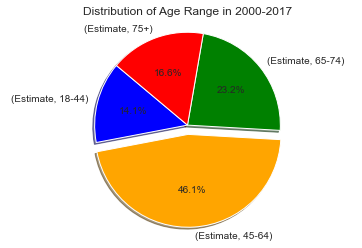

In [199]:
# Generate a pie plot showing the distribution of Age Range using pandas

colors = ["blue", "orange", "green", "red"]
explode = (0,0.1,0,0)
age_table_pop_sum.plot.pie(y="Age Range", explode = explode, colors = colors,autopct="%1.1f%%", startangle=140, shadow = True)

plt.title("Distribution of Age Range in 2000-2017")
plt.ylabel(" ")
plt.axis("equal")

plt.savefig("Figures/Distribution of Age Range in 2000-2017", bbox_inches = "tight")
plt.show()

In [200]:
# Generate a pie plot showing the distribution of Age Range in 2000

age_analysis_pop_2000 = diabetes_age_df.loc[(diabetes_age_df["indicatorid"] == 1) & \
                       (diabetes_age_df["estimateid"] == 101) & (diabetes_age_df["datasetid"] == 40) & \
                       (diabetes_age_df["yearid"] == 2000)]

# Creating Pivot Table to determine Age Range Population by year
age_table_pop_2000 = age_analysis_pop_2000.pivot_table(values=["Estimate"], index=["yearid"], columns=["Age Range"],aggfunc=np.sum)
age_table_pop_2000_sum = age_table_pop_2000.sum()
age_table_pop_2000_sum

          Age Range
Estimate  18-44       2,059.00
          45-64       5,040.00
          65-74       2,810.00
          75+         1,954.00
dtype: float64

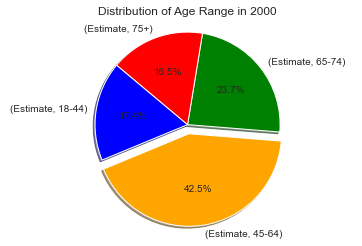

In [201]:
colors = ["blue", "orange", "green", "red"]
explode = (0,0.1,0,0)
age_table_pop_2000_sum.plot.pie(y='Age Range', explode = explode,colors = colors, startangle=140,autopct="%1.1f%%", shadow = True)

plt.title("Distribution of Age Range in 2000")
plt.ylabel(" ")
plt.axis("equal")

plt.savefig("Figures/Distribution of Age Range in 2000", bbox_inches = "tight")
plt.show()

In [202]:
# Generate a pie plot showing the distribution of Age Range in 2017

age_analysis_pop_2017 = diabetes_age_df.loc[(diabetes_age_df["indicatorid"] == 1) & \
                       (diabetes_age_df["estimateid"] == 101) & (diabetes_age_df["datasetid"] == 40) & \
                       (diabetes_age_df["yearid"] == 2017)]

# Creating Pivot Table to determine Age Range Population by year
age_table_pop_2017 = age_analysis_pop_2017.pivot_table(values=["Estimate"], index=["yearid"], columns=["Age Range"],aggfunc=np.sum)
age_table_pop_2017_sum = age_table_pop_2017.sum()
age_table_pop_2017_sum

          Age Range
Estimate  18-44        3,014.00
          45-64       10,598.00
          65-74        5,619.00
          75+          3,817.00
dtype: float64

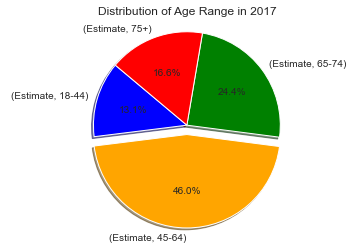

In [203]:
colors = ["blue", "orange", "green", "red"]
explode = (0,0.1,0,0)
age_table_pop_2017_sum.plot.pie(y='Age Range', explode = explode,colors = colors, startangle=140,autopct="%1.1f%%", shadow = True)

plt.title("Distribution of Age Range in 2017")
plt.ylabel(" ")
plt.axis("equal")

plt.savefig("Figures/Distribution of Age Range in 2017", bbox_inches = "tight")
plt.show()